# Fourier Series

In [1]:
from scipy.integrate import trapz
from scipy.fft import fft, fftfreq

import numpy as np
import matplotlib.pyplot as plt

def discretize_function(f, L, n_points=1000):
    x = np.linspace(-L/2, L/2, n_points)
    y = f(x)
    return x, y

def fourier_coefficients_trapz(f, L, n_terms):
    x, y = discretize_function(f, L)
    dx = x[1] - x[0]

    a0 = trapz(y, x) / L

    def cos_term(n):
        return y * np.cos(2 * n * np.pi * x / L)

    def sin_term(n):
        return y * np.sin(2 * n * np.pi * x / L)

    a_n = [trapz(cos_term(n), x) * 2 / L for n in range(1, n_terms + 1)]
    b_n = [trapz(sin_term(n), x) * 2 / L for n in range(1, n_terms + 1)]

    return a0, a_n, b_n

def fourier_series(x, L, a0, a_n, b_n):
    sum = a0
    for n in range(1, len(a_n) + 1):
        sum += a_n[n-1] * np.cos(2 * n * np.pi * x / L) + b_n[n-1] * np.sin(2 * n * np.pi * x / L)
    return sum

def fourier_transform(f):
    yf = fft(f)

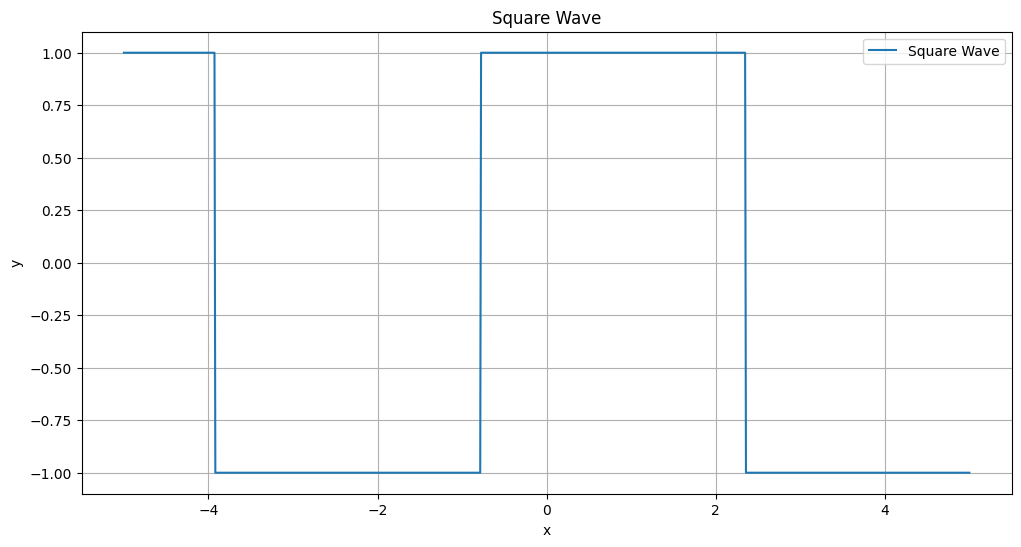

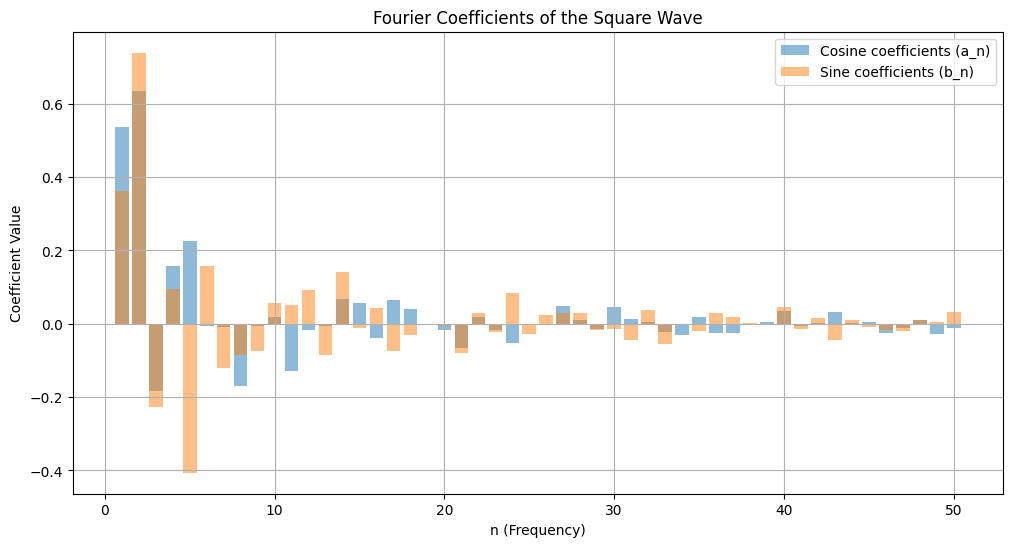

In [2]:

def square_wave(x):
    return np.sign(np.sin(x+np.pi/4))

L = 10
n_terms = 50
a0, a_n, b_n = fourier_coefficients_trapz(square_wave, L, n_terms)


# Plotting the square wave
x = np.linspace(-L/2, L/2, 1000)
y = square_wave(x)
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Square Wave')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Square Wave')
plt.legend()
plt.grid(True)
plt.show()


# Plotting the coefficients
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_terms + 1), a_n, label='Cosine coefficients (a_n)', alpha=0.5)
plt.bar(range(1, n_terms + 1), b_n, label='Sine coefficients (b_n)', alpha=0.5)
plt.xlabel('n (Frequency)')
plt.ylabel('Coefficient Value')
plt.title('Fourier Coefficients of the Square Wave')
plt.legend()
plt.grid(True)
plt.show()


# # Plotting the fourier transform
# x = np.linspace(-L/2, L/2, 1000)
# y = square_wave(x)
# yf = fft(y)
# xf = fftfreq(len(x), x[1] - x[0])

# ### only show the positive frequencies
# yf = yf[xf >= 0][:100]
# xf = xf[xf >= 0][:100]

# plt.figure(figsize=(12, 6))
# plt.plot(xf, yf, label='Fourier Transform')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.title('Fourier Transform of the Square Wave')
# plt.legend()
# plt.grid(True)
# plt.show()




In [3]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Your existing imports and functions remain the same

# Modified plotting function with dynamic number of terms
def plot_fourier_series(n_terms):
    a0, a_n, b_n = fourier_coefficients_trapz(square_wave, L, n_terms)

    x = np.linspace(-L/2, L/2, 1000)
    y = fourier_series(x, L, a0, a_n, b_n)

    plt.figure(figsize=(12, 6))
    plt.plot(x, y, label='Fourier Series with n_terms = {}'.format(n_terms))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fourier Series of the Square Wave')
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider for number of terms
n_terms_slider = widgets.IntSlider(value=10, min=1, max=100, step=1, description='n_terms:')

# Display the interactive plot
interact(plot_fourier_series, n_terms=n_terms_slider)


interactive(children=(IntSlider(value=10, description='n_terms:', min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_fourier_series(n_terms)>

# Fourier Feature Mapping

(99, 99, 2)


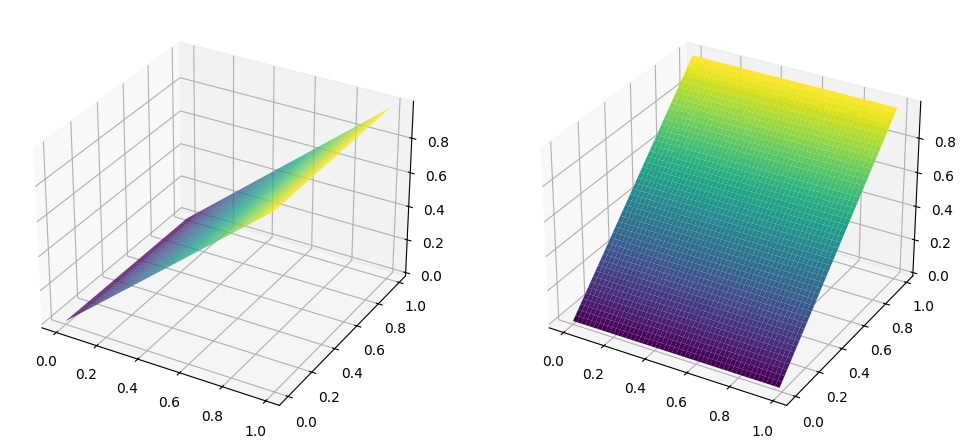

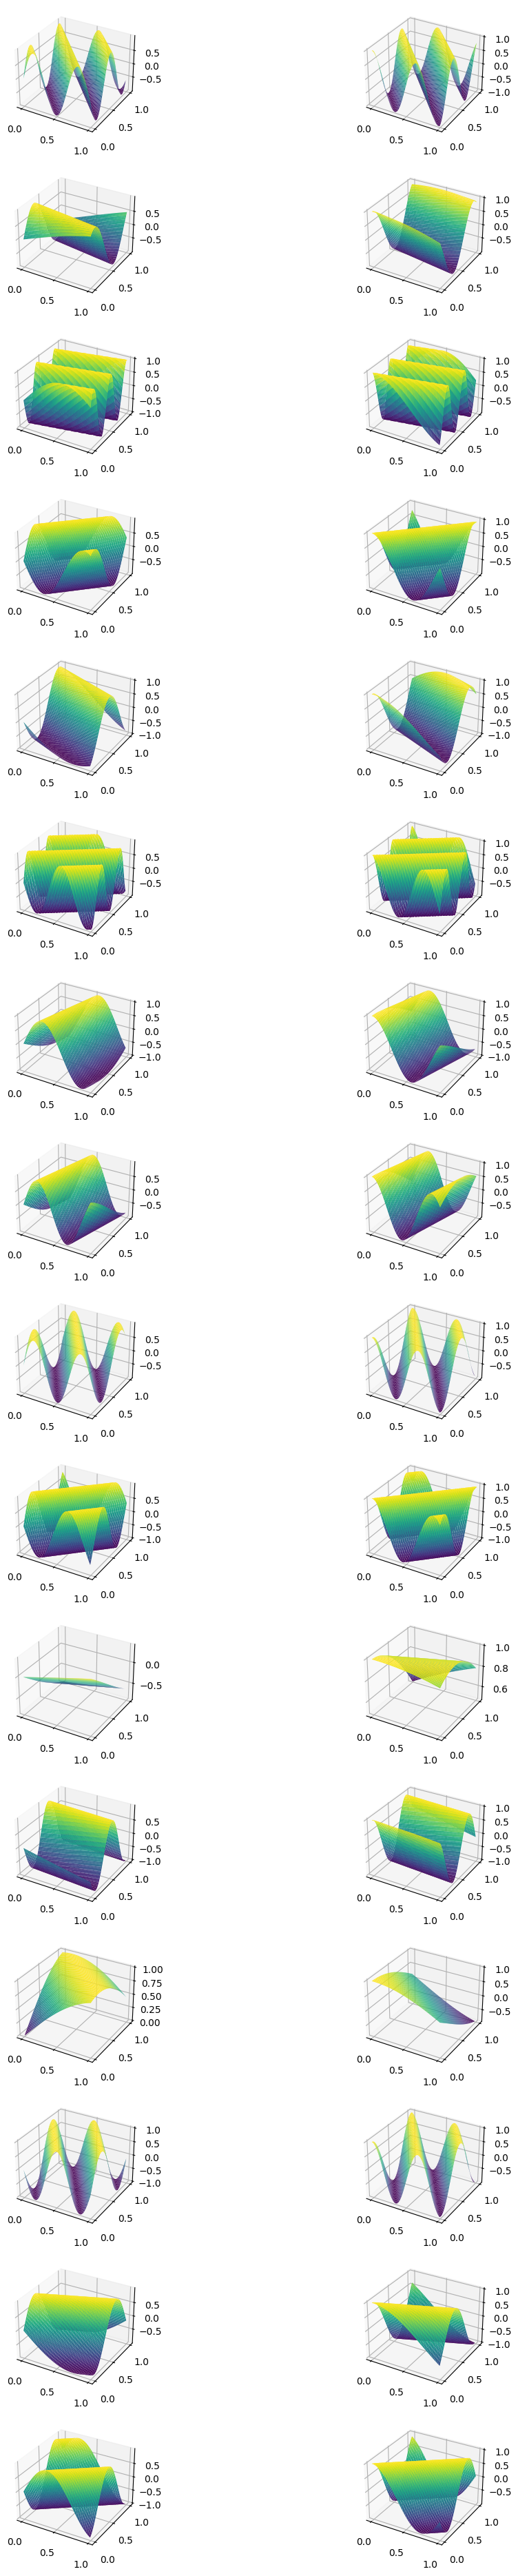

In [28]:
from function_regression.models.ffn_mlp import FFNLayer

mapping_size = 16
scale = 1

ffn_layer = FFNLayer(in_features=2,mapping_size=mapping_size, scale=scale)

## create a 2d meshgrid for the input space
x1 = np.linspace(0, 1, 100)[:-1]
x = np.stack(np.meshgrid(x1,x1), axis=-1)

print(x.shape)

## plot the input space in 3d with one subplot for each dimension
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})
axs[0].plot_surface(x[:,:,0], x[:,:,1], x[:,:,0], cmap='viridis')
axs[1].plot_surface(x[:,:,0], x[:,:,1], x[:,:,1], cmap='viridis')
plt.show()


## plot the output space in 3d with one subplot for each dimension of the mapped input

x_mapped = ffn_layer(x)

sin_features = x_mapped[...,:mapping_size]
cos_features = x_mapped[...,mapping_size:]

fig, axs = plt.subplots(mapping_size, 2, figsize=(12,48), subplot_kw={'projection': '3d'})

for i in range(mapping_size):
    axs[i,0].plot_surface(x[:,:,0], x[:,:,1], sin_features[:,:,i], cmap='viridis')
    axs[i,1].plot_surface(x[:,:,0], x[:,:,1], cos_features[:,:,i], cmap='viridis')
plt.show()

